In [147]:
#imported all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
df = pd.read_csv(r'https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [149]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [150]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [152]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [153]:
drop_cols = ['encounter_id',	'patient_nbr',	'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
df.drop(drop_cols, inplace = True, axis=1)

In [154]:
missing_values = ['?','None']
df =pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values = missing_values)
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [136]:
df.shape

(101766, 50)

In [68]:
df.describe

<bound method NDFrame.describe of                    race  gender      age
0             Caucasian  Female   [0-10)
1             Caucasian  Female  [10-20)
2       AfricanAmerican  Female  [20-30)
3             Caucasian    Male  [30-40)
4             Caucasian    Male  [40-50)
...                 ...     ...      ...
101761  AfricanAmerican    Male  [70-80)
101762  AfricanAmerican  Female  [80-90)
101763        Caucasian    Male  [70-80)
101764        Caucasian  Female  [80-90)
101765        Caucasian    Male  [70-80)

[101766 rows x 3 columns]>

In [69]:
df.isnull()

,race,gender,age
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
101761,False,False,False
101762,False,False,False
101763,False,False,False
101764,False,False,False


In [71]:
df.isnull().sum()

race      2273
gender       0
age          0
dtype: int64

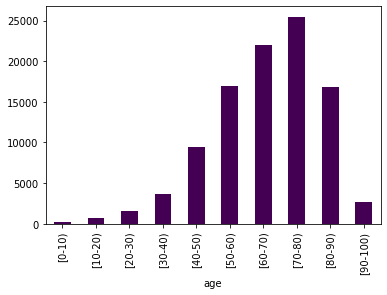

In [72]:
df.groupby('age')['race'].count().plot(kind='bar', colormap='viridis')

In [73]:
df.groupby('race')['gender'].count()

race
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Name: gender, dtype: int64

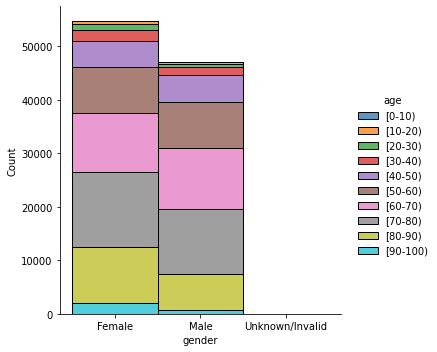

In [98]:
sns.displot(data=df, x="gender", hue="age", multiple="stack")

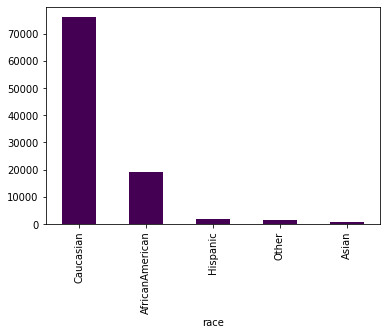

In [74]:
df.groupby('race')['gender'].count().sort_values(ascending=False).plot(kind='bar', colormap='viridis')

In [118]:
df[df['race'] == 'Caucasian'].sort_values(by=['age'])

,race,gender,age
0,Caucasian,Female,[0-10)
4571,Caucasian,Male,[0-10)
87974,Caucasian,Male,[0-10)
4610,Caucasian,Female,[0-10)
4708,Caucasian,Female,[0-10)
...,...,...,...
21720,Caucasian,Female,[90-100)
68345,Caucasian,Male,[90-100)
29814,Caucasian,Female,[90-100)
80363,Caucasian,Female,[90-100)


In [115]:
race1= df[df['race'] == 'Caucasian']

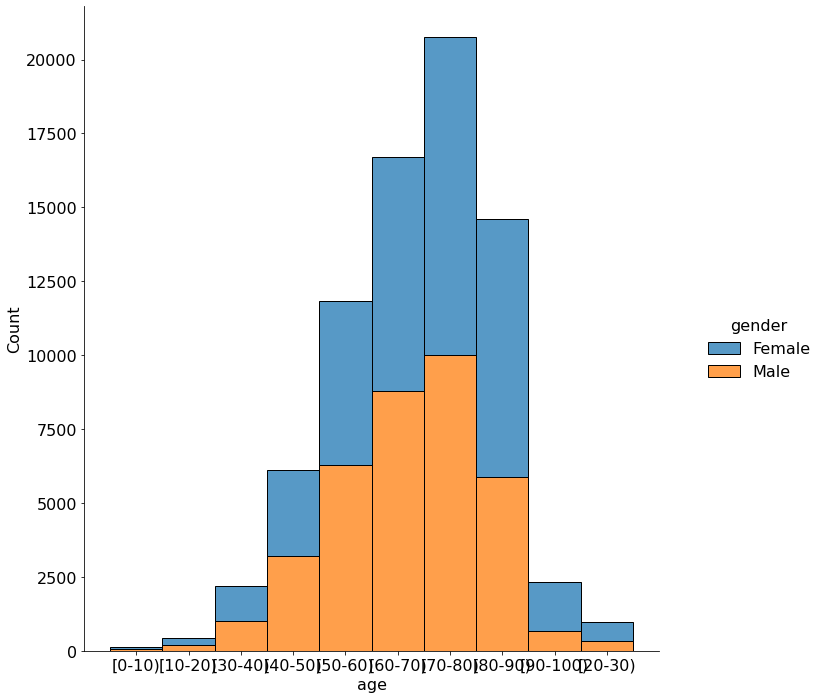

In [121]:
sns.displot(data=race1, x="age", hue="gender", multiple="stack",binwidth=12, height=10, facet_kws=dict(margin_titles=True))

In [80]:
race1.dtypes

race      object
gender    object
age       object
dtype: object

In [81]:
race1.groupby('race')['age'].count()

race
Caucasian    76099
Name: age, dtype: int64

In [82]:
df[df['race'] == 'AfricanAmerican']

,race,gender,age
2,AfricanAmerican,Female,[20-30)
10,AfricanAmerican,Female,[40-50)
11,AfricanAmerican,Male,[60-70)
14,AfricanAmerican,Female,[60-70)
15,AfricanAmerican,Male,[60-70)
...,...,...,...
101739,AfricanAmerican,Male,[70-80)
101741,AfricanAmerican,Male,[90-100)
101760,AfricanAmerican,Female,[60-70)
101761,AfricanAmerican,Male,[70-80)


In [83]:
race2 = df[df['race'] == 'AfricanAmerican']

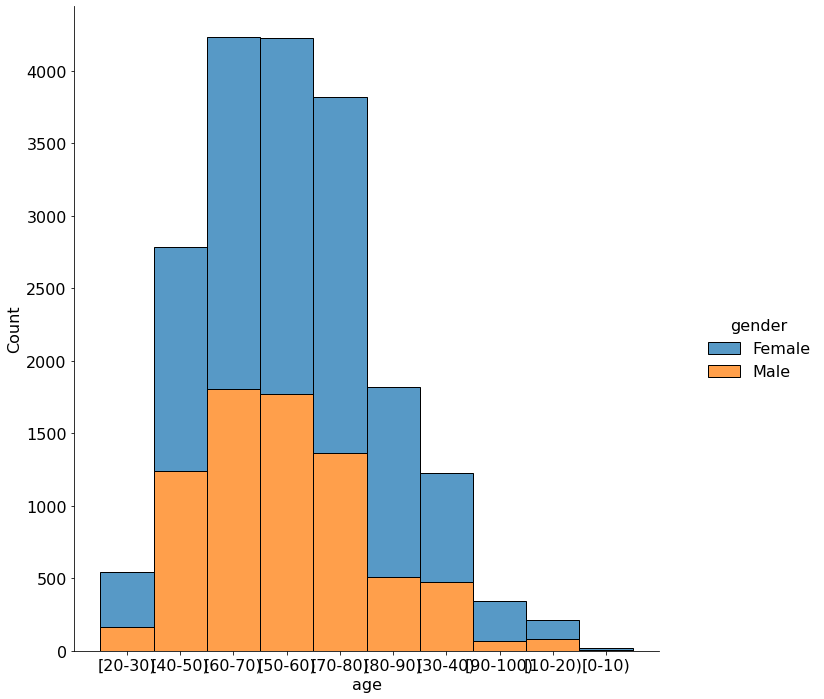

In [112]:
sns.displot(data=race2, x="age", hue="gender", multiple="stack", binwidth=12, height=10, facet_kws=dict(margin_titles=True))

In [84]:
seldata = pd.concat([race1, race2], ignore_index=True)

In [85]:
seldata

,race,gender,age
0,Caucasian,Female,[0-10)
1,Caucasian,Female,[10-20)
2,Caucasian,Male,[30-40)
3,Caucasian,Male,[40-50)
4,Caucasian,Male,[50-60)
...,...,...,...
95304,AfricanAmerican,Male,[70-80)
95305,AfricanAmerican,Male,[90-100)
95306,AfricanAmerican,Female,[60-70)
95307,AfricanAmerican,Male,[70-80)


In [86]:
import matplotlib.pyplot as plt
import numpy as np

In [125]:
seldata.sort_values(by=['age'])['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Name: race, dtype: int64

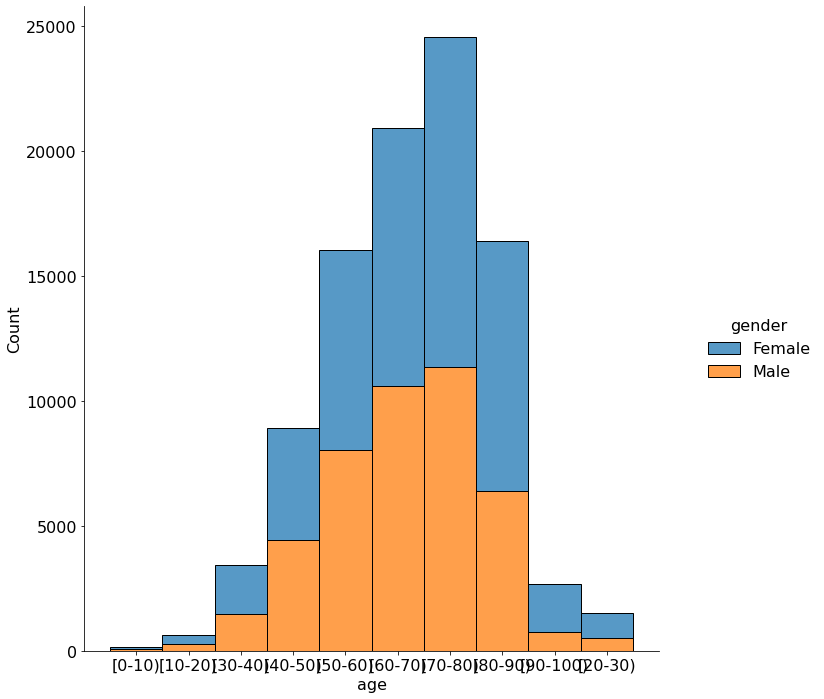

In [126]:
sns.displot(data=seldata, x="age", hue="gender", multiple="stack", binwidth=12, height=10, facet_kws=dict(margin_titles=True))

My plan for this project was:
1) Show percentages of people afected by diabeties by race in general dataset.
2) Isolate two datasets to compare if age is different in reference to the race. I picked races: Caucasian and AfroAmerican as these were the bigest samples.
3) Show the difference in ages of people affected by diabeties by race.

I failed because:
- I started to work on the project too late
- I realized I have no knowlege of visual presentation of data